
# **Proyek Analisis Data: order_payments_dataset**


# **Menentukan Pertanyaan Bisnis**
1. Berapa rata-rata jumlah angsuran pembayaran yang dipilih pelanggan?
2. Berapa total nilai pembayaran untuk setiap jenis pembayaran, dan bagaimana perbandingannya dengan nilai pembayaran keseluruhan?
3. Berapa persentase pesanan yang dibayar penuh sekaligus (**`payment_sequential` = 1**) dan apa yang bisa kita lakukan untuk meningkatkan atau mempertahankan persentase ini?
4. Bagaimana perbedaan nilai pembayaran berdasarkan jumlah angsuran pembayaran?
5. Apakah ada korelasi antara jumlah angsuran pembayaran yang dipilih pelanggan dengan nilai pembayaran?

# **Import Semua Packages/Library yang Digunakan**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Wrangling**

## **Gathering Data**

In [2]:
# Membuat tabel payments
payments_df = pd.read_csv("https://raw.githubusercontent.com/kaylaisya/submission/main/order_payments_dataset.csv")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


## **Assessing Data**

In [3]:
# Menilai Data payments_df
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Pada hasil, tidak ada masalah dalam baik jumlah data maupun tipe data. Selanjutnya, masalah yang perlu diperiksa adalah duplikasi data dan ringkasan parameter statistik. Untuk memeriksanya, kode berikut akan dijalankan.

In [4]:
# Memberikan jumlah duplikasi data
print("Jumlah duplikasi: ", payments_df.duplicated().sum())

# Menampilkan ringkasan parameter statistik
payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Setelah diperhatikan, tidak terdapat keanehan pada hasil tersebut. Hal lain yang perlu diperhatikan dalam assessing data adalah apakah terdapat outlier di dataset tersebut. Oleh karena itu, kode berikut dijalankan.

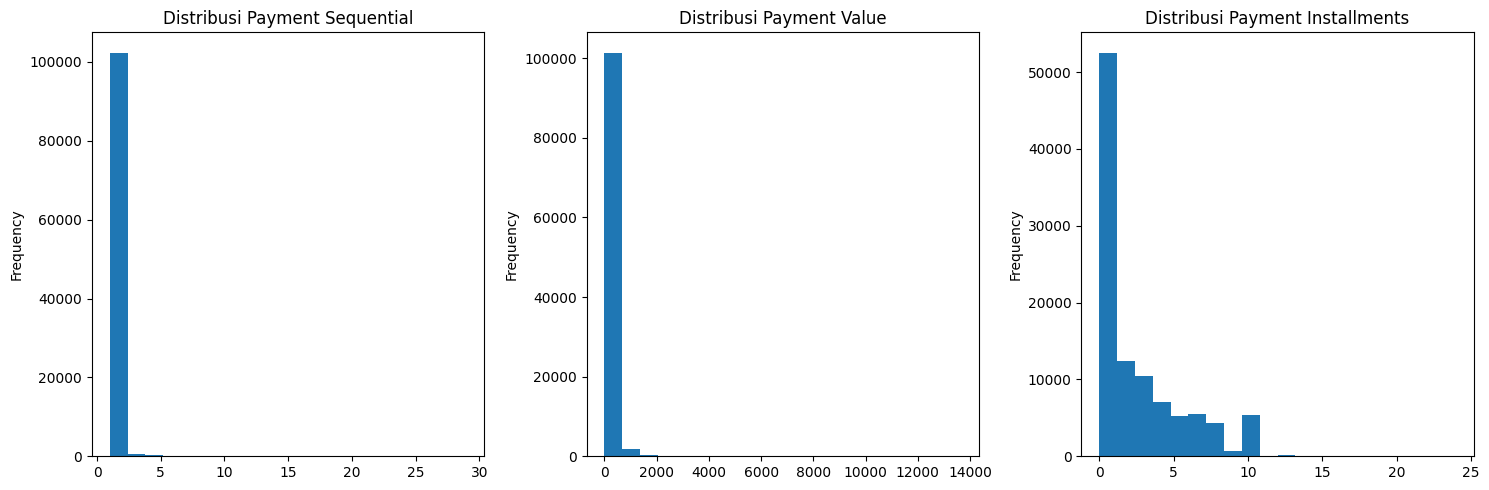

In [5]:
# Membuat gambar dan sumbu untuk setiap histogram
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot histogram
payments_df['payment_sequential'].plot(kind='hist', bins=20, ax=axs[0], title='Distribusi Payment Sequential')
payments_df['payment_value'].plot(kind='hist', bins=20, ax=axs[1], title='Distribusi Payment Value')
payments_df['payment_installments'].plot(kind='hist', bins=20, ax=axs[2], title='Distribusi Payment Installments')

# Menyesuaikan tata letak
plt.tight_layout()

# Menampilkan plot gabungan
plt.show()

Dapat dilihat di grafik **Distribusi Payments Installments**, terdapat batang yang jauh lebih tinggi dibandingkan batang lainnya, yang menunjukkan titik data yang berbeda secara signifikan dari sebagian besar data. Hal ini mengindikasikan bahwa terdapat outlier dan perlu diatasi di tahap cleaning data.

## **Cleaning Data**

Sebelumnya di assessing data, kita ketahui bahwa terdapat masalah outlier. Pada prinsipnya, ada dua pendekatan umum yang sering digunakan, yaitu dengan menghapusnya (**drop**) atau menggunakan metode imputasi (**imputation**).

Imputation dapat mempertahankan distribusi data, tetapi dapat menyebabkan bias jika nilainya tidak representatif. Sedangkan menghapus outlier akan menghilangkan potensi masalah outlier, tetapi dapat menghilangkan informasi dan berkurangnya ukuran sampel. 

Secara umum, jika outlier di data `payment_installments` adalah nilai ekstrem yang kemungkinan tidak valid atau mewakili distribusi, mungkin lebih tepat untuk menghilangkannya. Namun, dalam kasus ini, outlier di `payment_installments` valid tetapi nilai ekstrem. Sehingga imputasi mungkin merupakan solusi yang lebih baik untuk mempertahankan distribusi data secara kesalahan.

Untuk melakukan imputasi, kode ini dijalankan.

In [6]:
# Menghitung kuartil pertama dan ketiga untuk payment_installments
Q1_installments = payments_df['payment_installments'].quantile(0.25)
Q3_installments = payments_df['payment_installments'].quantile(0.75)

# Menghitung Interquartile Range untuk payment_installments
IQR_installments = Q3_installments - Q1_installments

# Menghitung nilai maksimum dan minimum untuk mendeteksi outlier pada payment_installments
maximum_installments = Q3_installments + (1.5 * IQR_installments)
minimum_installments = Q1_installments - (1.5 * IQR_installments)

# Membuat kondisi untuk outlier pada payment_installments
condition_lower_than_installments = payments_df['payment_installments'] < minimum_installments
condition_more_than_installments = payments_df['payment_installments'] > maximum_installments

# Mengganti outlier dengan nilai maksimum dan minimum pada payment_installments
payments_df.loc[condition_more_than_installments, 'payment_installments'] = maximum_installments
payments_df.loc[condition_lower_than_installments, 'payment_installments'] = minimum_installments


C:\Users\acer\AppData\Local\Temp\ipykernel_20648\1869616040.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  payments_df.loc[condition_more_than_installments, 'payment_installments'] = maximum_installments


Untuk memastikan tidak ada outlier lagi, kita dapat melihat histogram `payment_installments` dengan kode berikut.

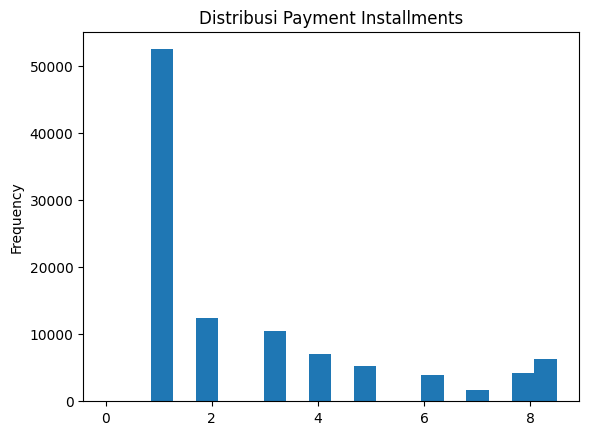

In [7]:
# Plot histogram
payments_df['payment_installments'].plot(kind='hist', bins=20, title='Distribusi Payment Installments')
plt.show()

Dari historgam tersebut, dapat dilihat bahwa tidak ada lagi titik data yang berbeda secara signifikan dari sebagian besar data. Hal ini menandakan tidak ada lagi outlier di data.

# **Exploratory Data Analysis (EDA)**

Analisis Data Eksploratori (ADE) adalah pendekatan ini dilakukan untuk menganalisis kumpulan data untuk merangkum karakteristik utamanya, biasanya dengan visualisasi data. Dalam analisis ini, kita akan menjawab beberapa pertayaan yaitu:

# **Visualization & Explanatory Analysis**

1. Berapa rata-rata jumlah angsuran pembayaran yang dipilih pelanggan?

In [8]:
avg_installments = payments_df['payment_installments'].mean()
print(f"Rata-rata jumlah pembayaran angsuran: {avg_installments:.2f}")

Rata-rata jumlah pembayaran angsuran: 2.75


Dari informasi ini, kita mendapat wawasan bahwa pelanggan cenderung membayar dalam beberapa angsuran daripada membayar secara penuh. Rata-rata jumlah 2,75 anguran atau sekitar 3 angsuran mungkin menunjukkan bahwa pelanggan memiliki preferensi untuk pembayaran berkala.

Informasi ini dapat membantu perusahaan untuk menyesuaikan kebijakan pembayaran mereka, seperti menawarkan opsi angsurang yang lebih fleksibel atau menyesuaikan penawaran harga agar lebih sesuai dengan preferensi pelanggan.

 2. Berapa total nilai pembayaran untuk setiap jenis pembayaran, dan bagaimana perbandingannya dengan nilai pembayaran keseluruhan?

Total nilai pembayaran untuk setiap jenis pembayaran:
payment_type
boleto          2869361.27
credit_card    12542084.19
debit_card       217989.79
voucher          379436.87
Name: payment_value, dtype: float64


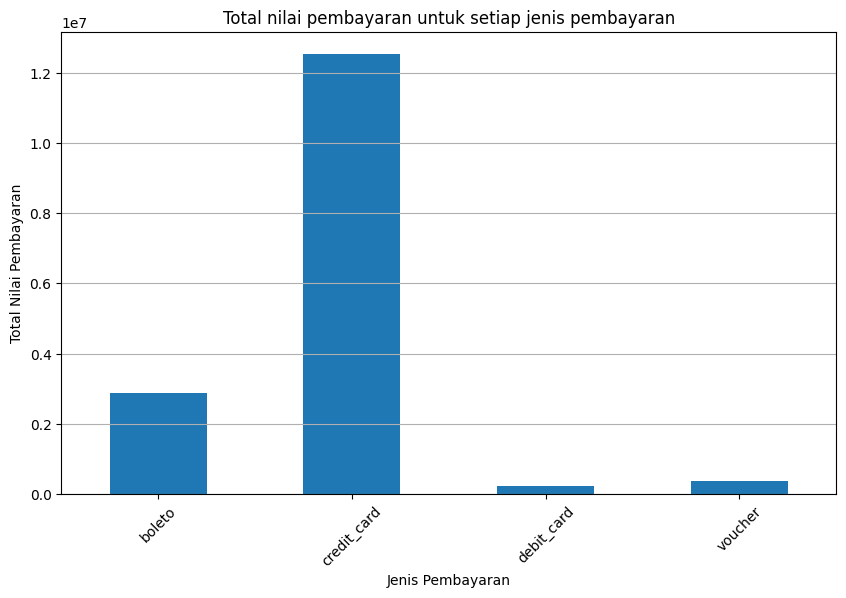

In [9]:
total_payment_value = payments_df.groupby('payment_type')['payment_value'].sum()
total_payment_value = total_payment_value[total_payment_value.index != 'not_defined']
print("Total nilai pembayaran untuk setiap jenis pembayaran:")
print(total_payment_value)

# Create a bar chart of the total payment value for each payment type
plt.figure(figsize=(10, 6))
total_payment_value.plot(kind='bar')
plt.title('Total nilai pembayaran untuk setiap jenis pembayaran')
plt.xlabel('Jenis Pembayaran')
plt.ylabel('Total Nilai Pembayaran')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Dari grafik ini, kita bisa tahu bahwa credit card adalah metode pembayaran dengan total nilai pembayaran terbesar yaitu sekitar 10 juta. Sedangkan total nilai pembayaran terendah dimiliki oleh jenis pembayaran debit card. Secara keseluruhan, penggunaan kartu kredit paling populer di kalangan pelanggan.

Grafik ini bisa berguna untuk menganalisa tren pembayaran dalam perusahaan e-commerce.

3. Berapa persentase pesanan yang dibayar penuh sekaligus (**`payment_sequential` = 1**) dan apa yang bisa kita lakukan untuk meningkatkan atau mempertahankan persentase ini?

In [10]:
full_payment_percentage = (payments_df['payment_sequential'] == 1).mean() * 100
print(f"Persentase pesanan dibayar penuh sekaligus: {full_payment_percentage:.2f}%")

Persentase pesanan dibayar penuh sekaligus: 95.64%


Tingkat pembayaran penuh yang tinggi (96,54%) menunjukkan bahwa sebagian besar pelanggan cenderung melakukan pembayaran langsung secara penuh saat memesan produk. Ini bisa mencerminkan kenyamanan dan kemudahan proses pembayaran yang disediakan oleh platform.

Untuk mempertahankan tingkat pembayaran penuh sekaligus yang tinggi, perusahaan dapat terus meningkatkan pengalaman pelanggan dalam berbelanja online. Hal ini termasuk memastikan keamanan transaksi, kemudahan navigasi situs, serta pelayanan pelanggan yang responsif.Perusahaan juga bisa mempertimbangkan untuk menawarkan opsi pembayaran yang beragam.

4. Bagaimana perbedaan nilai pembayaran berdasarkan jumlah angsuran pembayaran?

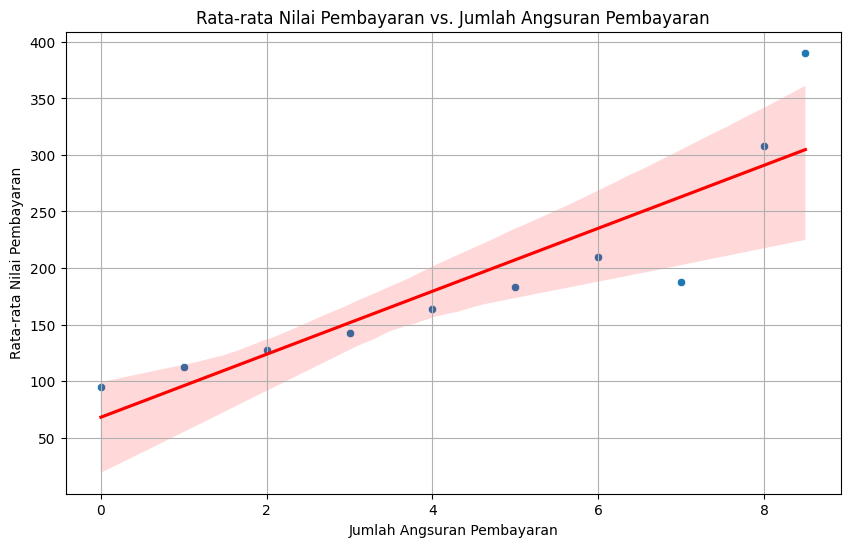

In [11]:
# Mengelompokkan data berdasarkan angsuran pembayaran dan hitung rata-rata nilai pembayaran setiap kelompok
avg_payment_value_by_installments = payments_df.groupby('payment_installments')['payment_value'].mean().reset_index()

# Plot hubungan antara angsuran pembayaran dan rata-rata nilai pembayaran
plt.figure(figsize=(10, 6))
sns.scatterplot(x='payment_installments', y='payment_value', data=avg_payment_value_by_installments)
sns.regplot(x='payment_installments', y='payment_value', data=avg_payment_value_by_installments, scatter=False, color='red')
plt.title('Rata-rata Nilai Pembayaran vs. Jumlah Angsuran Pembayaran')
plt.xlabel('Jumlah Angsuran Pembayaran')
plt.ylabel('Rata-rata Nilai Pembayaran')
plt.grid(True)
plt.show()

Berdasarkan scatter plot, terlihat bahwa ada korelasi positif antara jumlah angsuran pembayaran dan rata-rata nilai pembayaran. Ini berarti, semakin banyak jumlah angsuran pembayaran, semakin tinggi nilai pembayaran rata-ratanya.

Garis tren ini dapat digunakan untuk memprediksi nilai pembayaran rata-rata berdasarkan jumlah angsuran. Hal ini berguna untuk menginformasikan keputusan manajemen keuangan dan penentuan struktur pembayaran.

# **Analisis Lanjut**

Sebelumnya, di Analisis Data Eksploratori (ADE), kita mendapat informasi ada indikasi korelasi positif antara jumlah angsuran pembayaran dan rata-rata nilai pembayaran. Untuk memastikan ini, kita bisa melakukan analisis korelasi untuk memahami hubungan 2 hal tersebut lebih lanjut.

5. Apakah ada korelasi antara jumlah angsuran pembayaran yang dipilih pelanggan dengan nilai pembayaran?

In [12]:
correlation = payments_df['payment_installments'].corr(payments_df['payment_value'])
print(f"Korelasi antara angsuran pembayaran dengan nilai pembayaran: {correlation:.2f}")

Korelasi antara angsuran pembayaran dengan nilai pembayaran: 0.32


Dari informasi yang diberikan, terdapat korelasi positif yang lemah antara kedua variabel tersebut. Korelasi sebesar 0,32 menunjukkan bahwa ada hubungan positif antara jumlah angsuran pembayaran yang dipilih oleh pelanggan dengan nilai pembayaran, tetapi hubungan tersebut tidak terlalu kuat.

Meskipun korelasinya lemah, informasi ini dapat digunakan oleh perusahaan untuk mengambil langkah-langkah yang sesuai untuk meningkatkan penjualan, memahami perilaku pelanggan, dan mengoptimalkan strategi pembayaran mereka.

# **Conclusion**

- Pelanggan cenderung memilih pembayaran dalam beberapa angsuran daripada pembayaran penuh. Rata-rata jumlah angsuran sekitar 3 angsuran menunjukkan preferensi pelanggan untuk pembayaran berkala.
- Metode pembayaran yang paling populer adalah kartu kredit, dengan total nilai pembayaran tertinggi sekitar 10 juta. Di sisi lain, debit card memiliki total nilai pembayaran terendah.
- Tingkat pembayaran penuh yang tinggi (96,54%) menunjukkan bahwa sebagian besar pelanggan cenderung melakukan pembayaran langsung secara penuh saat memesan produk.
- Berdasarkan scatter plot, terlihat bahwa ada korelasi positif antara jumlah angsuran pembayaran dan rata-rata nilai pembayaran. Ini berarti, semakin banyak jumlah angsuran pembayaran, semakin tinggi nilai pembayaran rata-ratanya.
- Terdapat korelasi positif yang lemah antara jumlah angsuran pembayaran yang dipilih oleh pelanggan dengan nilai pembayaran. Korelasi sebesar 0,32 menunjukkan bahwa ada hubungan positif antara kedua variabel tersebut, meskipun tidak terlalu kuat.